#Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
# Importing Libraries...
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Loading Data

In [3]:
# Loading Data...
ratings = pd.read_csv('/content/drive/MyDrive/Semester-2/Recommendation System/Assignment_2/RAW_interactions.csv')
recipes = pd.read_csv('/content/drive/MyDrive/Semester-2/Recommendation System/Assignment_2/RAW_recipes.csv')

In [ ]:
ratings.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
# Checking for duplicates
print(ratings.duplicated().sum())
print(recipes.duplicated().sum())

0
0


In [ ]:
print(ratings.shape)
print(recipes.shape)

(1132367, 5)
(231637, 12)


# Preprocessing

In [4]:
# Replacing column name of recipes dataframe...
recipes.rename(columns={'id':'recipe_id'},inplace=True)
recipes.head()

,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


## Merging Data

In [5]:
# Merging the ratings and recipes dataframe on recipe_id
ratings_with_name = ratings.merge(recipes, on='recipe_id')
ratings_with_name.head()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",white bean green chile pepper soup,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,devilicious cookie cake delights,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",baked potato toppings,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


## Filtering based on users

In [6]:
# Filtering merged dataframe based on the users...
X = ratings_with_name.groupby('user_id').count()['rating'] > 100
genuine_users = X[X].index
genuine_users

Int64Index([      1533,       1535,       2310,       2312,       3288,
                  4291,       4439,       4470,       4740,       5060,
            ...
               2206637,    2324285,    2399085,    2549237,    2597942,
            1800054678, 1802849661, 2000431901, 2000498330, 2001102678],
           dtype='int64', name='user_id', length=1368)

In [7]:
# Filtered ratings...
filtered_ratings = ratings_with_name[ratings_with_name['user_id'].isin(genuine_users)]

## Filtering Based on Recipes

In [8]:
# Filtering Based on recipes...
y = filtered_ratings.groupby('name').count()['rating']>=50
famous_recipes = y[y].index

In [9]:
# Final ratings dataframe...
final_ratings = filtered_ratings[filtered_ratings['name'].isin(famous_recipes)]

In [10]:
# Dropping Duplicates if any...
final_ratings.drop_duplicates()

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4212,149363,96886,2005-05-11,5,This was awesome! Our whole family loved this ...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4214,209441,96886,2005-06-06,5,"Awesome IS the word for this, I made this for ...",kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4216,73836,96886,2005-09-07,5,This was scrumptious. I halved the recipe suc...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4217,160974,96886,2005-09-11,5,I'm a spinach lover but the rest of the family...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
4218,195175,96886,2005-09-15,5,This makes a great side dish for company. It's...,kittencal s spinach parmesan rice bake,40,89831,2004-08-04,"['60-minutes-or-less', 'time-to-make', 'course...","[351.2, 36.0, 3.0, 20.0, 35.0, 70.0, 5.0]",7,"['set oven to 350f', 'generously grease a 11 x...",this is a wonderful easy side dish to chicken ...,"['frozen chopped spinach', 'cooked white rice'...",13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123827,130531,131018,2014-12-14,5,I have been making this recipe for a couple of...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123829,121690,131018,2015-01-08,5,I&#039;ve made this twice without substitution...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123855,51931,131018,2015-11-29,5,I am reviewing the recipe two ways. One as wr...,pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4
1123860,59686,131018,2016-03-18,5,"Since we butcher our own meat, I used a 4-1/2 ...",pulled pork crock pot,1110,50509,2005-07-25,"['time-to-make', 'course', 'main-ingredient', ...","[335.1, 10.0, 72.0, 24.0, 80.0, 10.0, 8.0]",26,"['slice one onion and place in crock pot', 'pu...","i found this pulled pork recipe years ago, and...","['pork roast', 'onions', 'ginger ale', 'barbec...",4


# Train-Test Split

In [11]:
# Train-Test Split...
train_data, test_data = train_test_split(final_ratings, test_size=0.2)

In [12]:
test_data

,user_id,recipe_id,date,rating,review,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
65303,358796,18816,2008-03-09,5,"Made this, cutting the cooking time in half (I...",cabbage for those who dislike cabbage,40,20371,2002-02-04,"['60-minutes-or-less', 'time-to-make', 'course...","[89.3, 9.0, 20.0, 2.0, 2.0, 13.0, 2.0]",7,"['in a large skillet , heat butter and oil ove...",this is so much nicer than plain steamed or bo...,"['butter', 'canola oil', 'green cabbage', 'bro...",8
650011,185285,22782,2005-11-14,5,My husband and I made ourselves sick on this s...,jo mama s world famous spaghetti,80,25455,2002-03-17,"['weeknight', 'time-to-make', 'course', 'main-...","[555.9, 40.0, 45.0, 85.0, 59.0, 45.0, 16.0]",10,"['in large , heavy stockpot , brown italian sa...",my kids will give up a steak dinner for this s...,"['italian sausage', 'onion', 'garlic cloves', ...",16
204280,51011,8782,2006-10-08,5,There are a million variations of this recipe ...,roast sticky chicken,325,6411,2001-04-20,"['weeknight', 'time-to-make', 'course', 'main-...","[238.0, 24.0, 9.0, 67.0, 35.0, 22.0, 2.0]",12,"['blend all spices together and set aside', 'r...","beautiful and delicious, this incredibly moist...","['salt', 'paprika', 'cayenne pepper', 'onion p...",10
1045974,232886,31516,2009-01-01,4,"A very tasty, very easy casserole. I added two...",spanish chicken rice bake,50,26278,2002-06-17,"['60-minutes-or-less', 'time-to-make', 'course...","[496.8, 26.0, 14.0, 50.0, 78.0, 32.0, 15.0]",5,"['mix soup , salsa , water , corn , and beans ...",a throw-it-together and pop it in the oven sup...,"['cream of chicken soup', 'salsa', 'water', 'w...",9
219350,128447,28603,2004-09-26,5,This is stupendous. I took the batch to work ...,halloween party treat candy corn and peanut mix,10,37036,2002-05-16,[''],"[166.1, 21.0, 4.0, 9.0, 13.0, 9.0, 2.0]",2,"['mix the candy corn and peanuts together', 's...",great little snack you can easily throw togeth...,"['candy corn', 'salted peanuts']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982590,227652,63786,2011-02-05,4,This is great recipe!! Hubby wanted chicken fa...,steak or chicken fajitas,20,82367,2003-06-05,"['30-minutes-or-less', 'time-to-make', 'course...","[137.2, 8.0, 8.0, 14.0, 5.0, 5.0, 6.0]",12,"['slice steak into thin strips', 'in bowl , mi...",these are so quick and tasty. you can use stri...,"['top sirloin steak', 'olive oil', 'lime juice...",16
915505,68960,118761,2007-03-27,4,The method worked really well. I love my eggs...,microwave poached eggs,6,133174,2005-04-23,"['15-minutes-or-less', 'time-to-make', 'course...","[71.6, 7.0, 0.0, 3.0, 12.0, 7.0, 0.0]",6,['add the water and white vinegar to a 6 ounce...,i have been poaching eggs in the microwave for...,"['egg', 'white vinegar', 'water', 'salt and pe...",4
799480,33159,95222,2007-09-20,5,We enjoyed this recipe very much! Succulent f...,pork chops yum yum,70,82507,2004-07-07,"['time-to-make', 'course', 'main-ingredient', ...","[427.1, 27.0, 78.0, 53.0, 87.0, 30.0, 6.0]",4,"['brown chops on both sides', 'place in grease...",i copied this from the orlando sentinel months...,"['pork chops', 'chicken broth', 'honey', 'soy ...",7
786269,394077,80413,2007-01-24,5,Very good bread. Turned out beautifully. I u...,homemade hamburger buns bread machine,19,24386,2004-01-07,"['30-minutes-or-less', 'time-to-make', 'course...","[198.9, 5.0, 17.0, 7.0, 11.0, 9.0, 11.0]",9,"[""place all ingredients , except butter , in p...",you will never want to buy hamburger buns agai...,"['milk', 'egg', 'butter', 'white sugar', 'salt...",7


# Creating Pivot Table

In [13]:
# create pivot table for train data
train_pt = train_data.pivot_table(index='name', columns='user_id', values='rating')
# calculate similarity scores
similarity_scores = cosine_similarity(train_pt.fillna(0))
# create pivot table for test data
test_pt = test_data.pivot_table(index='name', columns='user_id', values='rating')
# test_pt.fillna(0,inplace=True)
# train_pt.fillna(0,inplace=True)

In [14]:
test_pt

user_id,1535,2310,2312,3288,4291,4439,4470,4740,5060,6258,...,1680722,1701315,2123645,2206637,2324285,2549237,2597942,1800054678,2000431901,2001102678
name,,,,,,,,,,,,,,,,,,,,,
24k carrots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 minute spicy garlic shrimp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40 minute hamburger buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute best ever lasagna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all purpose stir fry sauce brown garlic sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ww 0 point weight watchers cabbage soup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yes virginia there is a great meatloaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy crispy baked fish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_pt.columns

Int64Index([      1535,       2310,       2312,       3288,       4291,
                  4439,       4470,       4740,       5060,       6258,
            ...
               1680722,    1701315,    2123645,    2206637,    2324285,
               2549237,    2597942, 1800054678, 2000431901, 2001102678],
           dtype='int64', name='user_id', length=1164)

In [16]:
# Calculate the baseline estimate for the user
user_ratings = train_pt[47559]
user_mean = user_ratings.mean()
item_means = train_pt.mean(axis=1)
b_ui = user_mean - item_means
b_ui

name
24k carrots                                       0.290834
4 minute spicy garlic shrimp                      0.031014
40 minute hamburger buns                          0.130435
absolute best ever lasagna                        0.156461
all purpose stir fry sauce  brown garlic sauce    0.071014
                                                    ...   
ww 0 point weight watchers cabbage soup           0.336263
yes  virginia there is a great meatloaf           0.552315
yummy crispy baked fish                           0.575181
yummy crunchy apple pie                          -0.033490
zesty oven baked fries                           -0.087218
Length: 311, dtype: float64

In [17]:
rated_recipes = train_pt[47559]
rated_recipes = rated_recipes[rated_recipes.notna()]
unrated_recipes = train_pt.index.difference(rated_recipes.index)
unrated_recipes

Index(['24k carrots', '4 minute spicy garlic shrimp',
       '40 minute hamburger buns', 'absolute best ever lasagna',
       'all purpose stir fry sauce  brown garlic sauce',
       'allrighty then scrambled eggs   paula deen',
       'almost white castle hamburgers', 'amazing chicken marinade',
       'amazing white trash puff balls',
       'armenian herb marinade grilled chicken breasts',
       ...
       'weight watchers parmesan chicken cutlets', 'wet burritos',
       'whatever floats your boat  brownies',
       'white almond sour cream wedding cake',
       'white chocolate chip cranberry oatmeal cookies',
       'why i joined zaar carrot cake', 'wonderful salsa',
       'ww 0 point weight watchers cabbage soup',
       'yes  virginia there is a great meatloaf', 'yummy crunchy apple pie'],
      dtype='object', name='name', length=265)

In [19]:
similarity_scores_for_recipe = similarity_scores[train_pt.index.get_loc('24k carrots')]
user_ratings = train_pt[47559].fillna(0)

# Subtract the baseline estimate from the user's rating
r_ui_baseline = user_mean + b_ui.loc['24k carrots']

numerator = ((user_ratings - r_ui_baseline) * similarity_scores_for_recipe).sum()
denominator = similarity_scores_for_recipe.sum()

if denominator == 0:
  predicted_rating = 0
else:
  predicted_rating = r_ui_baseline + numerator / denominator

predicted_rating

0.7523072758811358

# Recommendation Engine

In [20]:
# loop over each user in the test set
def get_top_k_recommendations(user_id,k):
    if user_id not in train_pt.columns:
        return []
    # get the recipes that the user has not rated
    rated_recipes = train_pt[user_id]
    # rated_recipes = rated_recipes[rated_recipes != 0]
    rated_recipes = rated_recipes[rated_recipes.notna()]  
    unrated_recipes = train_pt.index.difference(rated_recipes.index)
    predicted_ratings = []
    
    # Calculate the baseline estimate for the user
    user_ratings = train_pt[user_id]
    user_mean = user_ratings.mean()
    item_means = train_pt.mean(axis=1)
    b_ui = user_mean - item_means

    # loop over each unrated recipe
    for recipe_name in unrated_recipes:
        # calculate predicted rating using similarity scores and user ratings
        similarity_scores_for_recipe = similarity_scores[train_pt.index.get_loc(recipe_name)]
        user_ratings = train_pt[user_id].fillna(0)
        # Subtract the baseline estimate from the user's rating
        r_ui_baseline = user_mean + b_ui.loc[recipe_name]
        numerator = ((user_ratings - r_ui_baseline) * similarity_scores_for_recipe).sum()
        denominator = similarity_scores_for_recipe.sum()
        if denominator == 0:
            predicted_rating = 0
        else:
            predicted_rating = numerator / denominator
        
        predicted_ratings.append((recipe_name, predicted_rating))

    # predicted_ratings = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)
    # top_k_recommendations = [r[0] for r in predicted_ratings][:k]
    top_recipe_names = [recipe_name for recipe_name, predicted_rating in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:k]]
    return top_recipe_names
    # return top_k_recommendations

In [ ]:
top_recipes = get_top_k_recommendations(47559,10)
top_recipes

['easy peezy pizza dough  bread machine pizza dough',
 'chicken legs grilled',
 'pan release  professional pan coating  better than pam spray',
 'halloween party treat  candy corn and peanut mix',
 'breakfast in a mug',
 'grilled cheese  diner style',
 'bacon wrapped jalapeno poppers',
 'best banana bread',
 'self rising flour',
 'buttered egg noodles  best ever']

# Evaluating Recommendations

In [21]:
def evaluate_recommendations(user_id, k):
    # get the actual rated recipes for the user
    actual_rated_recipes = test_pt[user_id]
    actual_rated_recipes = actual_rated_recipes[actual_rated_recipes.notna()]
    actual_rated_recipes_set = set(actual_rated_recipes.index)
    
    # get the top-k recommended recipes for the user
    top_k_recommendations = get_top_k_recommendations(user_id, k)
    top_k_recommendations_set = set(top_k_recommendations)
    
    # calculate precision and recall
    intersection = actual_rated_recipes_set.intersection(top_k_recommendations_set)
    if len(top_k_recommendations_set) == 0:
      precision = 0.0
    else:
      precision = len(intersection) / len(top_k_recommendations_set)
    recall = len(intersection) / len(actual_rated_recipes_set)
    
    return precision, recall

In [ ]:
P,R = evaluate_recommendations(23333,10)
print("Precision: ",P)
print("Recall: ",R)

Precision:  0.0
Recall:  0.0


In [22]:
k_values = [5, 10, 20, 50, 100]
precision_scores = []
recall_scores = []

for k in k_values:
    total_precision = 0
    total_recall = 0
    num_users = 0

    for user_id in test_pt.columns:
        if not test_pt[user_id].isnull().all():
            precision, recall = evaluate_recommendations(user_id, k)
            total_precision += precision
            total_recall += recall
            num_users += 1

    precision_scores.append(total_precision / num_users)
    recall_scores.append(total_recall / num_users)

print("Precision scores:", precision_scores)
print("Recall scores:", recall_scores)


Precision scores: [0.017353951890034337, 0.016580756013745708, 0.014948453608247491, 0.015206185567010174, 0.015071592210767395]
Recall scores: [0.02024578977450848, 0.03756504067715409, 0.06580084453197496, 0.16007443443197258, 0.326994802800404]


# Visualizing Precision and Recall for Different K

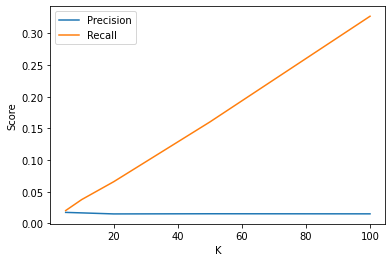

In [23]:
import matplotlib.pyplot as plt

plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, recall_scores, label='Recall')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()